In [1]:
!pip install psycopg2-binary
!pip install pandas plotnine
import os
import psycopg2 as ps
import pandas as pd
import sqlalchemy
import numpy as np
from plotnine import *
from matplotlib import pyplot as plt

In [2]:
conn = sqlalchemy.create_engine('hive://spark-master:10000/default')
pd.read_sql_query("use sample", con=conn)
pd.read_sql_query("show tables", con=conn)


,namespace,tableName,isTemporary
0,sample,aisles,False
1,sample,avg_product_count_by_dow,False
2,sample,clean_orders,False
3,sample,daily_orders,False
4,sample,daily_orders_7_day_avg,False
5,sample,departments,False
6,sample,order_products,False
7,sample,order_products__prior,False
8,sample,order_products__train,False
9,sample,orders,False


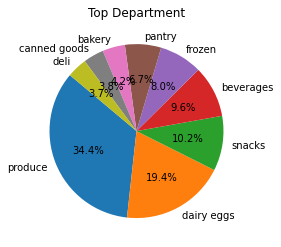

In [5]:
df = pd.read_sql_query("select * from top_selling_departments order by number_of_orders desc limit 10000;", con=conn).dropna()
plt.pie(df['number_of_orders'], labels = df['department'], shadow=False,  autopct = '%1.1f%%', startangle = 140)
plt.title('Top Department') # Title
plt.show()
 

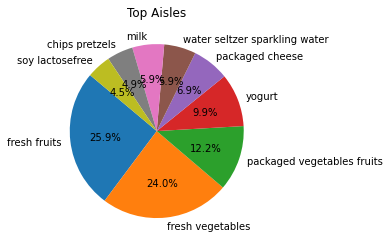

In [6]:
df = pd.read_sql_query("select * from top_selling_aisles order by number_of_orders desc limit 10000;", con=conn).dropna()
plt.pie(df['number_of_orders'], labels = df['aisle'], shadow=False,  autopct = '%1.1f%%', startangle = 140)
plt.title('Top Aisles') # Title
plt.show()
 

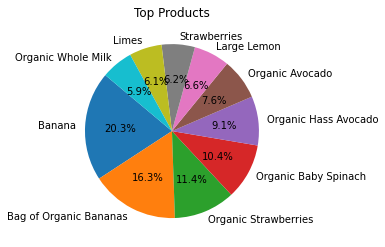

In [7]:

df = pd.read_sql_query("select * from top_selling_products order by number_of_orders desc limit 10000;", con=conn).dropna()
plt.pie(df['number_of_orders'], labels = df['product_name'], shadow=False,  autopct = '%1.1f%%', startangle = 140)
plt.title('Top Products') # Title
plt.show()
 



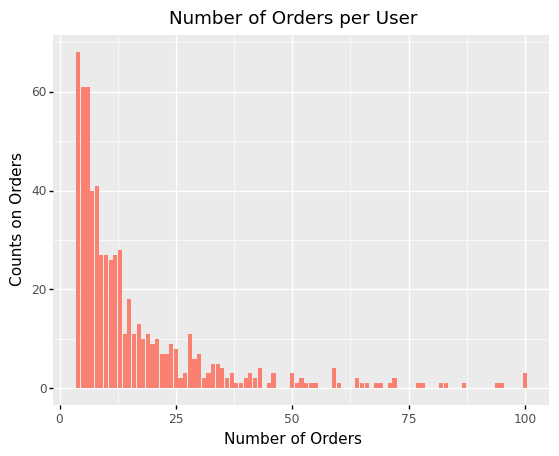

<ggplot: (8760865277242)>

In [8]:

dfOrders = pd.read_sql_query("select * from clean_orders order by user_id, order_number limit 10000;", con=conn)
grouped_df = dfOrders.groupby('user_id')["order_id"].count().reset_index(name='total_orders').sort_values(['total_orders'], ascending=False)
ggplot(grouped_df, aes(x='total_orders')) + geom_bar(stat = 'count') + geom_bar(fill="salmon") + ggtitle("Number of Orders per User")  +  ylab("Counts on Orders") + xlab("Number of Orders")


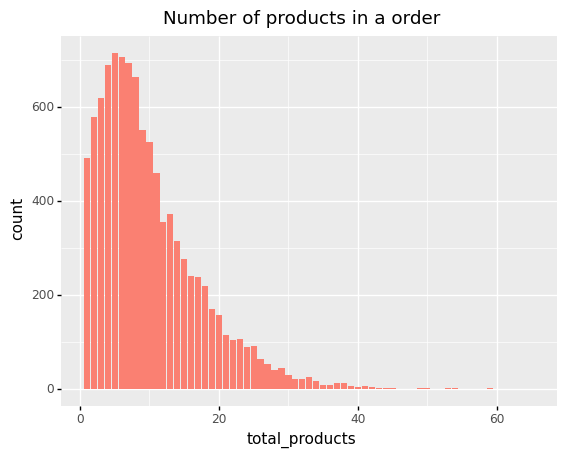

<ggplot: (8760865270806)>

In [9]:

dfOrdersProducts = pd.read_sql_query("select * from order_products order by order_id, add_to_cart_order limit 100000;", con=conn)
group_df = dfOrdersProducts.groupby('order_id')["product_id"].count().reset_index(name='total_products').sort_values(['total_products'], ascending=False)
ggplot(group_df, aes(x='total_products')) + geom_bar(stat = 'count') + geom_bar(fill="salmon") + ggtitle("Number of products in a order") 

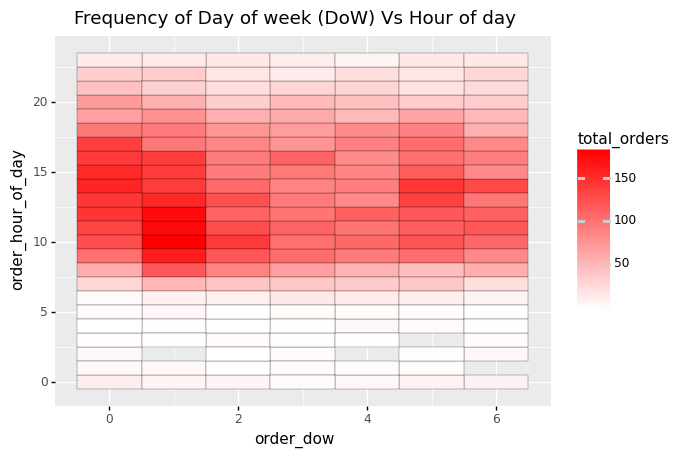

<ggplot: (8760865136912)>

In [10]:

grouped_df = dfOrders.groupby(['order_dow', 'order_hour_of_day'])["order_id"].count().reset_index(name='total_orders').sort_values(['total_orders'], ascending=False)
ggplot(grouped_df, aes(x='order_dow', y='order_hour_of_day')) + geom_tile(aes(fill = 'total_orders'), colour = "black") + scale_fill_gradient(low = "white", high = "red") + ggtitle("Frequency of Day of week (DoW) Vs Hour of day") 

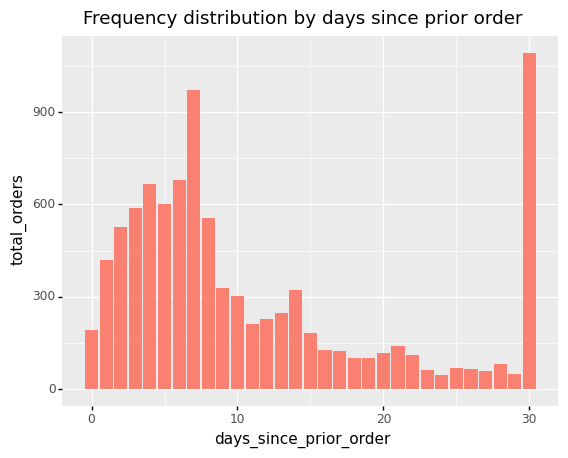

<ggplot: (8760865110089)>

In [11]:

grouped_df = dfOrders.dropna().groupby(['days_since_prior_order'])["order_id"].count().reset_index(name='total_orders').sort_values(['total_orders'], ascending=False)
ggplot(grouped_df, aes(x='days_since_prior_order', y='total_orders')) + geom_bar(stat="identity",fill="salmon") +  ggtitle("Frequency distribution by days since prior order")